In [85]:
# load two csv files
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

book_info = pd.read_csv('../data/clean_data/clean_book_info.csv')
reviews_df = pd.read_csv('../data/clean_data/reviews_with_stress.csv')

# EDA

In [103]:
book_info.shape

(1686, 15)

In [104]:
book_info.dtypes

title_id            int64
title              object
author             object
publish_date       object
pages             float64
format             object
rating            float64
rating_counts       int64
reviews_counts      int64
votes               int64
year                int64
description        object
main_genre         object
is_bestseller       int64
award              object
dtype: object

In [115]:
book_info.nunique()

title_id          1686
title             1686
author            1304
publish_date       404
pages              416
format               8
rating             132
rating_counts     1660
reviews_counts    1547
votes             1606
year                 5
description       1686
main_genre           5
is_bestseller        2
award               89
dtype: int64

In [109]:
book_info.describe()

,title_id,pages,rating,rating_counts,reviews_counts,votes,year,is_bestseller
count,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000
mean,3276.955516,345.276987,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,0.254448
std,1165.691971,137.123717,0.266701,1.833264e+05,18631.789505,21167.234433,1.403076,0.435680
min,111.000000,0.000000,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,0.000000
25%,2937.750000,273.000000,3.840000,7.302250e+03,1080.250000,2844.250000,2020.000000,0.000000
50%,3585.500000,338.000000,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,0.000000
75%,4150.750000,406.000000,4.240000,7.305325e+04,9216.750000,19772.750000,2022.000000,1.000000
max,4697.000000,1242.000000,4.750000,2.683087e+06,234321.000000,397565.000000,2023.000000,1.000000


In [108]:
book_info.describe(include='all')

,title_id,title,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,main_genre,is_bestseller,award
count,1686.000000,1686,1686,1686,1686.000000,1686,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686,1686,1686.000000,1686
unique,NaN,1686,1304,404,NaN,8,NaN,NaN,NaN,NaN,NaN,1686,5,NaN,89
top,NaN,The Testaments,Brandon Sanderson,2021-05-04,NaN,Hardcover,NaN,NaN,NaN,NaN,NaN,When the van door slammed on Offred's future a...,Literature/Fiction,NaN,best-fiction-books-2019
freq,NaN,1,7,18,NaN,1393,NaN,NaN,NaN,NaN,NaN,1,1082,NaN,20
mean,3276.955516,NaN,NaN,NaN,345.276987,NaN,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,NaN,NaN,0.254448,NaN
std,1165.691971,NaN,NaN,NaN,137.123717,NaN,0.266701,1.833264e+05,18631.789505,21167.234433,1.403076,NaN,NaN,0.435680,NaN
min,111.000000,NaN,NaN,NaN,0.000000,NaN,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,NaN,NaN,0.000000,NaN
25%,2937.750000,NaN,NaN,NaN,273.000000,NaN,3.840000,7.302250e+03,1080.250000,2844.250000,2020.000000,NaN,NaN,0.000000,NaN
50%,3585.500000,NaN,NaN,NaN,338.000000,NaN,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,NaN,NaN,0.000000,NaN
75%,4150.750000,NaN,NaN,NaN,406.000000,NaN,4.240000,7.305325e+04,9216.750000,19772.750000,2022.000000,NaN,NaN,1.000000,NaN


In [110]:
book_info.isnull().sum()

title_id          0
title             0
author            0
publish_date      0
pages             0
format            0
rating            0
rating_counts     0
reviews_counts    0
votes             0
year              0
description       0
main_genre        0
is_bestseller     0
award             0
dtype: int64

- From the basic statistics, we can observe the following points:

  - title_id: The range of book IDs is from 111 to 4697, with a total of 1686 books.
  - author: The most prolific author is Brandon Sanderson, with 7 award-winning books.
  - publish_date: The most common publication date is May 4, 2021, with 18 books released on this date.
  - pages: The number of pages ranges from 0 to 1242, with an average of 345 pages. Note that the minimum value of 0 may indicate a data error or missing value.
  - format: The most common format is Hardcover, with 1393 books.
  - rating: Ratings range from 3.16 to 4.75, with an average rating of about 4.05.
  - rating_counts and reviews_counts: There is a large disparity in the number of ratings and reviews, indicating that some books are more popular or receive more attention than others.
  - votes: The number of votes ranges from 383 to 397565, with a median of 7365.5, suggesting a right-skewed distribution.
  - year: The dataset covers the years from 2019 to 2023.
  - description: Each book has a unique description.
  - main_genre: The most common main genre is Literature/Fiction.
  - is_bestseller: About 25% of the books are bestsellers.
  - award: There are many categories of awards the books have won, with the most common category including 20 books.

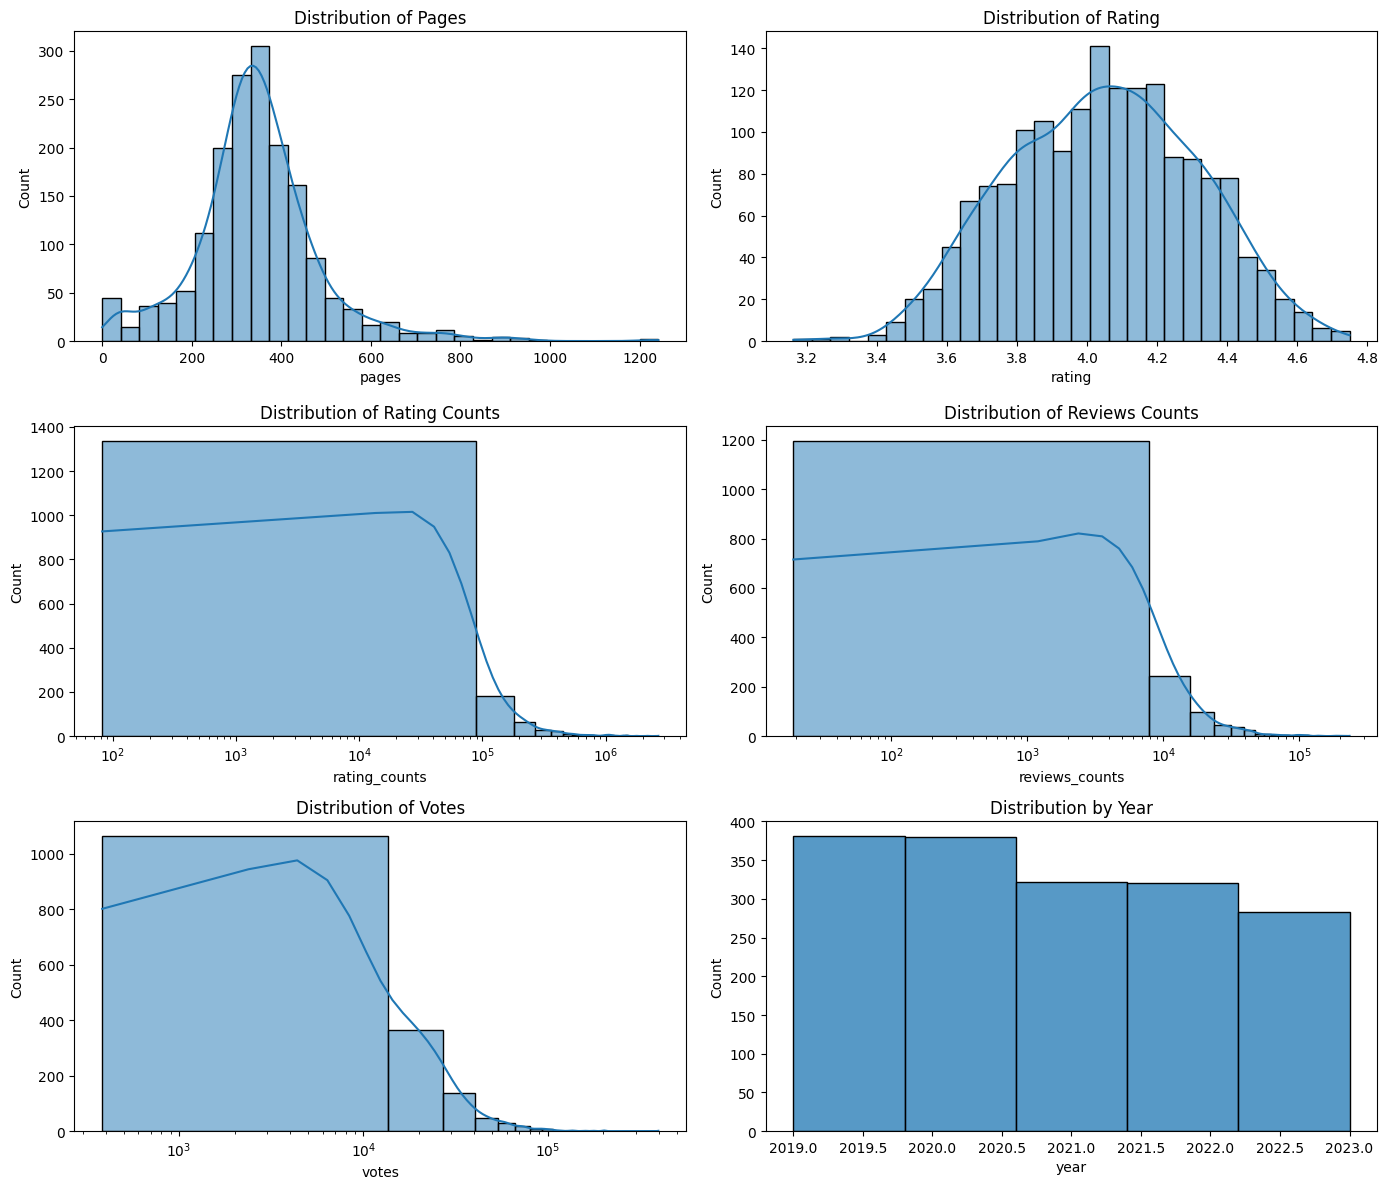

In [112]:
# Visualization

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Distribution of pages
sns.histplot(book_info['pages'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Pages')

# Distribution of rating
sns.histplot(book_info['rating'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rating')

# Distribution of rating_counts
sns.histplot(book_info['rating_counts'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Rating Counts')
axes[1, 0].set_xscale('log')

# Distribution of reviews_counts
sns.histplot(book_info['reviews_counts'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Reviews Counts')
axes[1, 1].set_xscale('log')

# Distribution of votes
sns.histplot(book_info['votes'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Votes')
axes[2, 0].set_xscale('log')

# Distribution of year
sns.histplot(book_info['year'], bins=5, kde=False, ax=axes[2, 1])
axes[2, 1].set_title('Distribution by Year')

plt.tight_layout()
plt.show()


# Frequency of words in reviews with stress (predicted_stress = 1)

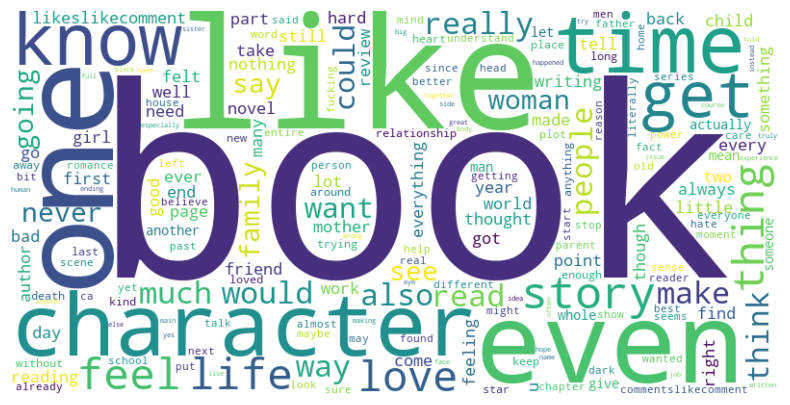

In [61]:
# filter the reviews stress=1
stress_reviews = reviews_df[reviews_df['predicted_stress'] == 1]['processed_text']

# calculate the frequency of words
words_in_stress_reviews = []
for review in stress_reviews:
    words_in_stress_reviews.extend(review.split())

word_counts_in_stress_reviews = Counter(words_in_stress_reviews)

# build a  wordcloud
wordcloud_stress = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_in_stress_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')

wordcloud_stress.to_file("../img/wordcloud_review.png")
plt.show()


# Merge the book info data with the reviews data that includes predicted stress

In [122]:
# Merge the book info data with the reviews data that includes predicted stress
merged_review_data = pd.merge(reviews_df, book_info, on='title_id', how='left')
merged_review_data = merged_review_data.drop(columns=['title_y']).rename(columns={'title_x':'title'})
merged_review_data.head(3)

,Unnamed: 0,title_id,title,review_no,review,processed_text,predicted_stress,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,main_genre,is_bestseller,award
0,0,111,five feet apart,1,[3.5] There’s some disagreement within the CF ...,disagreement within cf community whether book ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
1,1,111,five feet apart,2,Edit: For the love of God I wrote this review ...,edit love god wrote review two year ago still ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
2,2,111,five feet apart,3,Can't say I'm surprised I didn't enjoy this bo...,ca say surprised enjoy book part goodreads rea...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019


In [123]:
merged_review_data.shape

(16860, 20)

In [124]:
merged_review_data.dtypes

Unnamed: 0            int64
title_id              int64
title                object
review_no             int64
review               object
processed_text       object
predicted_stress      int64
author               object
publish_date         object
pages               float64
format               object
rating              float64
rating_counts         int64
reviews_counts        int64
votes                 int64
year                  int64
description          object
main_genre           object
is_bestseller         int64
award                object
dtype: object

In [125]:
merged_review_data.nunique()

Unnamed: 0          16860
title_id             1686
title                1686
review_no              10
review              16811
processed_text      16662
predicted_stress        2
author               1304
publish_date          404
pages                 416
format                  8
rating                132
rating_counts        1660
reviews_counts       1547
votes                1606
year                    5
description          1686
main_genre              5
is_bestseller           2
award                  89
dtype: int64

In [126]:
merged_review_data.describe()

,Unnamed: 0,title_id,review_no,predicted_stress,pages,rating,rating_counts,reviews_counts,votes,year,is_bestseller
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,1.686000e+04,16860.000000,16860.000000,16860.000000,16860.000000
mean,8429.500000,3276.955516,5.500000,0.097331,345.276987,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,0.254448
std,4867.207105,1165.380783,2.872367,0.296417,137.087111,0.266630,1.832775e+05,18626.815649,21161.583726,1.402702,0.435564
min,0.000000,111.000000,1.000000,0.000000,0.000000,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,0.000000
25%,4214.750000,2937.000000,3.000000,0.000000,273.000000,3.840000,7.302000e+03,1080.000000,2843.000000,2020.000000,0.000000
50%,8429.500000,3585.500000,5.500000,0.000000,338.000000,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,0.000000
75%,12644.250000,4151.000000,8.000000,0.000000,406.000000,4.240000,7.319000e+04,9229.000000,19782.000000,2022.000000,1.000000
max,16859.000000,4697.000000,10.000000,1.000000,1242.000000,4.750000,2.683087e+06,234321.000000,397565.000000,2023.000000,1.000000


In [127]:
merged_review_data.describe(include='all')

,Unnamed: 0,title_id,title,review_no,review,processed_text,predicted_stress,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,main_genre,is_bestseller,award
count,16860.000000,16860.000000,16860,16860.000000,16860,16860,16860.000000,16860,16860,16860.000000,16860,16860.000000,1.686000e+04,16860.000000,16860.000000,16860.000000,16860,16860,16860.000000,16860
unique,NaN,NaN,1686,NaN,16811,16662,NaN,1304,404,NaN,8,NaN,NaN,NaN,NaN,NaN,1686,5,NaN,89
top,NaN,NaN,five feet apart,NaN,Not found,likeslikecomment,NaN,Brandon Sanderson,2021-05-04,NaN,Hardcover,NaN,NaN,NaN,NaN,NaN,In this moving story two teens fall in love wi...,Literature/Fiction,NaN,best-young-adult-fiction-books-2019
freq,NaN,NaN,10,NaN,50,102,NaN,70,180,NaN,13930,NaN,NaN,NaN,NaN,NaN,10,10820,NaN,200
mean,8429.500000,3276.955516,NaN,5.500000,NaN,NaN,0.097331,NaN,NaN,345.276987,NaN,4.046459,7.901742e+04,9173.467972,14746.444840,2020.848161,NaN,NaN,0.254448,NaN
std,4867.207105,1165.380783,NaN,2.872367,NaN,NaN,0.296417,NaN,NaN,137.087111,NaN,0.266630,1.832775e+05,18626.815649,21161.583726,1.402702,NaN,NaN,0.435564,NaN
min,0.000000,111.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,3.160000,8.200000e+01,19.000000,383.000000,2019.000000,NaN,NaN,0.000000,NaN
25%,4214.750000,2937.000000,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,273.000000,NaN,3.840000,7.302000e+03,1080.000000,2843.000000,2020.000000,NaN,NaN,0.000000,NaN
50%,8429.500000,3585.500000,NaN,5.500000,NaN,NaN,0.000000,NaN,NaN,338.000000,NaN,4.050000,2.400350e+04,3586.500000,7365.500000,2021.000000,NaN,NaN,0.000000,NaN
75%,12644.250000,4151.000000,NaN,8.000000,NaN,NaN,0.000000,NaN,NaN,406.000000,NaN,4.240000,7.319000e+04,9229.000000,19782.000000,2022.000000,NaN,NaN,1.000000,NaN


In [128]:
merged_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16860 non-null  int64  
 1   title_id          16860 non-null  int64  
 2   title             16860 non-null  object 
 3   review_no         16860 non-null  int64  
 4   review            16860 non-null  object 
 5   processed_text    16860 non-null  object 
 6   predicted_stress  16860 non-null  int64  
 7   author            16860 non-null  object 
 8   publish_date      16860 non-null  object 
 9   pages             16860 non-null  float64
 10  format            16860 non-null  object 
 11  rating            16860 non-null  float64
 12  rating_counts     16860 non-null  int64  
 13  reviews_counts    16860 non-null  int64  
 14  votes             16860 non-null  int64  
 15  year              16860 non-null  int64  
 16  description       16860 non-null  object

## Correlation

In [129]:
numerical_df = merged_review_data[['pages','rating','rating_counts','reviews_counts','votes','year','is_bestseller','predicted_stress']]

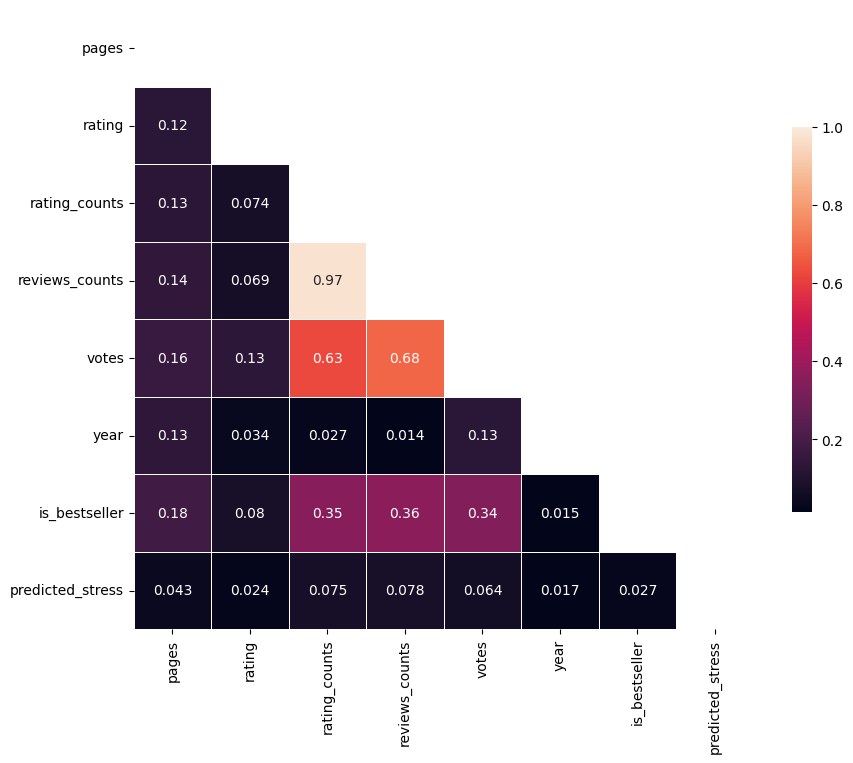

In [130]:
corr=np.abs(numerical_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [131]:
merged_review_data['predicted_stress'].value_counts()

predicted_stress
0    15219
1     1641
Name: count, dtype: int64

C:\Users\54189\AppData\Local\Temp\ipykernel_22004\3079639213.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_review_data['predicted_stress'],palette='Set3')


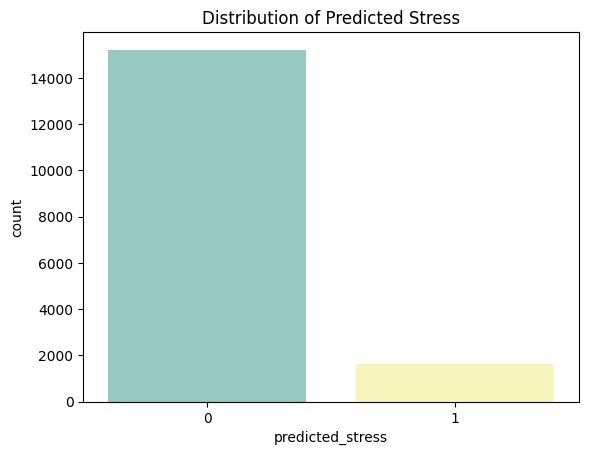

In [132]:
sns.countplot(x=merged_review_data['predicted_stress'],palette='Set3')
plt.title('Distribution of Predicted Stress')
plt.show()

In [133]:
# Group by genre and calculate the mean stress per genre
main_genre_stress_analysis = merged_review_data.groupby('main_genre')['predicted_stress'].mean().sort_values(ascending=False)
print(main_genre_stress_analysis)


main_genre
Romance/Drama            0.114286
Fantasy/Sci-Fi/Horror    0.111785
Literature/Fiction       0.089464
Nonfiction/Education     0.050000
Other                    0.000000
Name: predicted_stress, dtype: float64


- We have mapped the detailed book genres to five broader main categories and recalculated the average stress comment percentage for each category. The results show:

  - Romance/Drama: The average percentage of stress reviews is 11.4%.
  - Fantasy/Sci-Fi/Horror: The average percentage of stress reviews is 11.2%.
  - Literature/Fiction: The average percentage of stress reviews is 8.9%.
  - Nonfiction/Education: The average percentage of stress reviews is 5.0%.
  - Other: No stress reviews.
  
- Analysis Results:
- These results indicate that books in the Romance/Drama and Fantasy/Sci-Fi/Horror categories tend to evoke higher levels of stress in readers, while books in the Nonfiction/Education category show lower levels of stress. This may be related to the depth of content and emotional engagement associated with these categories of books.

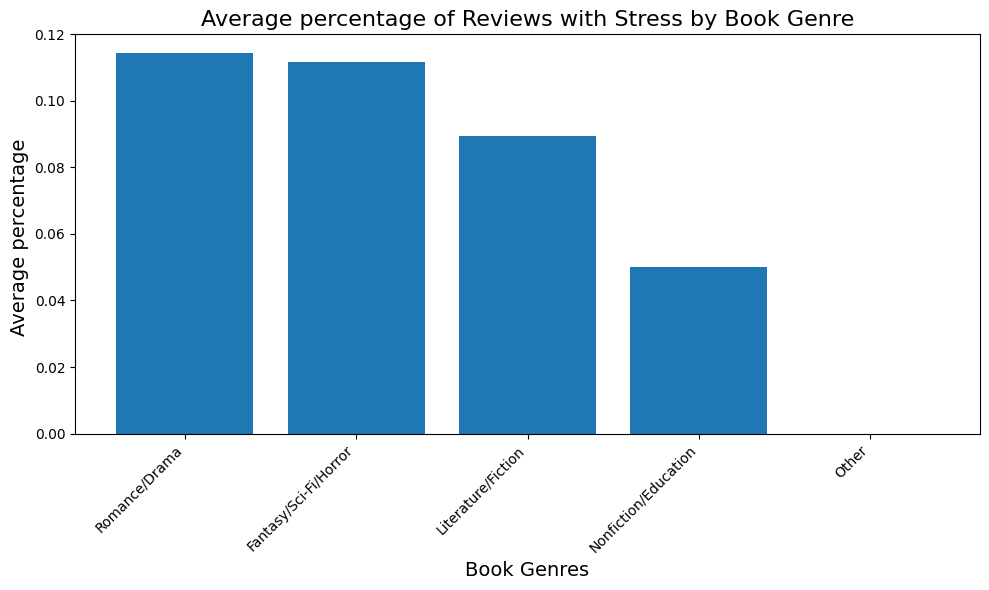

In [134]:
import matplotlib.pyplot as plt

genres = main_genre_stress_analysis.index
mean_stress = main_genre_stress_analysis.values

plt.figure(figsize=(10, 6))
plt.bar(genres, mean_stress)
plt.xlabel('Book Genres', fontsize=14)
plt.ylabel('Average percentage ', fontsize=14)
plt.title('Average percentage of Reviews with Stress by Book Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../img/stress&genre.png')
plt.show()


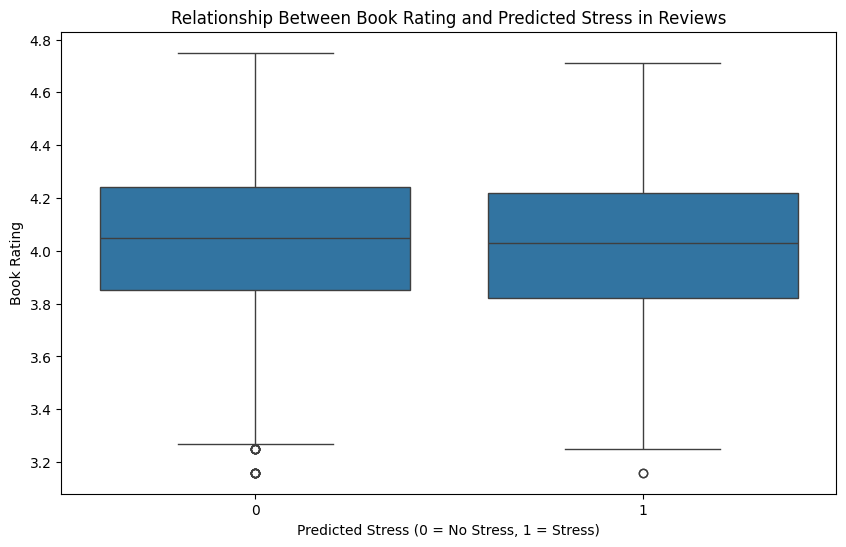

In [135]:
# Visualizing the relationship between book rating and predicted stress in reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='predicted_stress', y='rating', data=merged_review_data)
plt.title('Relationship Between Book Rating and Predicted Stress in Reviews')
plt.xlabel('Predicted Stress (0 = No Stress, 1 = Stress)')
plt.ylabel('Book Rating')
plt.show()

From the chart above, we can see that both the reviews predicted to have stress (1) and those predicted not to have stress (0) seem to have a similar distribution of book ratings, with the median for both around 4.0. This suggests that there may not be a clear direct relationship between the ratings and the predicted stress level in the reviews.

Next, we can explore the relationship between book genres (main_genre) and the predicted stress in the reviews. This will help us understand whether different types of books might influence the readers' feelings of stress.

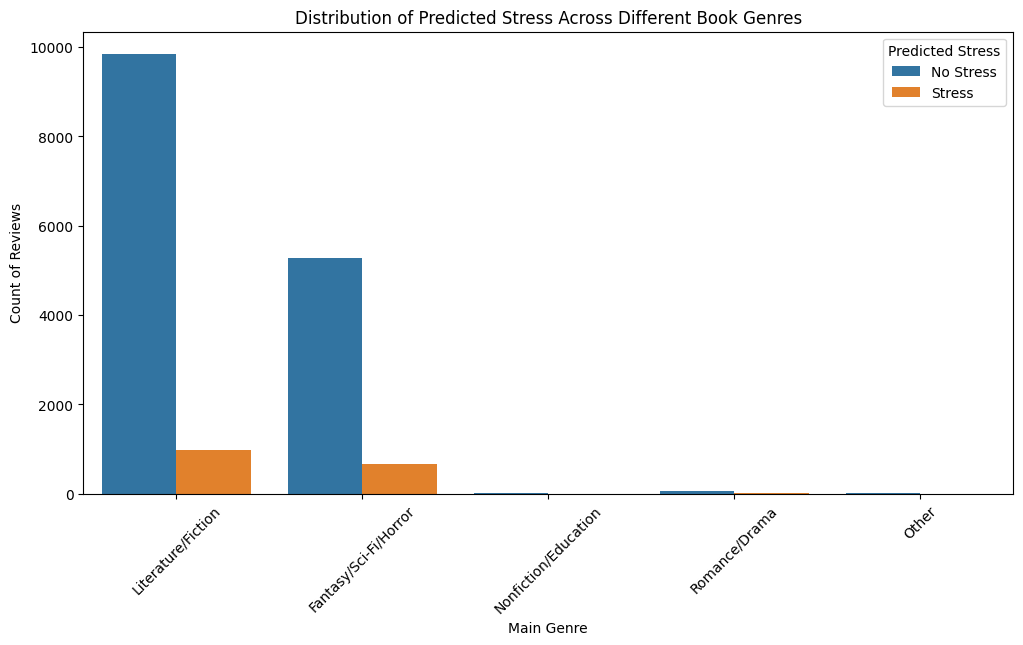

In [136]:
# Visualizing the distribution of predicted stress across different book genres
plt.figure(figsize=(12, 6))
sns.countplot(x='main_genre', hue='predicted_stress', data=merged_review_data)
plt.title('Distribution of Predicted Stress Across Different Book Genres')
plt.xlabel('Main Genre')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Predicted Stress', labels=['No Stress', 'Stress'])
plt.show()

The chart shows that there are some differences in the distribution of predicted stress in reviews across different book genres (main_genre). While the number of reviews without stress is significantly higher across all genres, certain types like "Literature/Fiction" and "Fantasy/Sci-Fi/Horror" exhibit a relatively higher number of stressed reviews. This might suggest that these genres could elicit more feelings of stress in some cases, or are associated with more engaging or emotionally rich content.

Next, we will analyze the differences in predicted stress in reviews between bestsellers and non-bestsellers. Additionally, we will conduct some text analysis to examine the differences in word usage and expression between reviews with predicted stress and those without. These analyses will help us understand the emotional characteristics expressed by readers in their reviews and the potential connections between these emotions and the characteristics of the books.

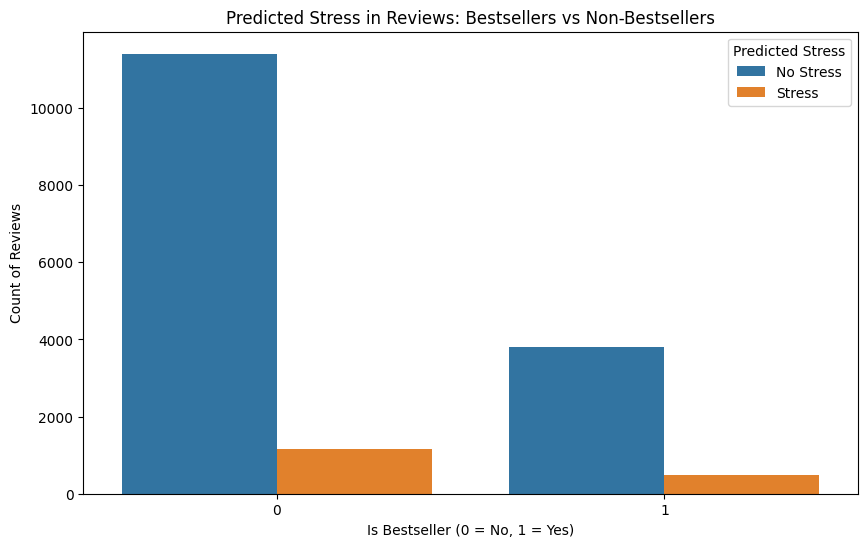

In [137]:
# Visualizing the distribution of predicted stress in reviews for bestsellers vs non-bestsellers
plt.figure(figsize=(10, 6))
sns.countplot(x='is_bestseller', hue='predicted_stress', data=merged_review_data)
plt.title('Predicted Stress in Reviews: Bestsellers vs Non-Bestsellers')
plt.xlabel('Is Bestseller (0 = No, 1 = Yes)')
plt.ylabel('Count of Reviews')
plt.legend(title='Predicted Stress', labels=['No Stress', 'Stress'])
plt.show()

In both bestsellers and non-bestsellers, the distribution of predicted stress in the reviews shows a similar pattern: in both types of books, the number of reviews without stress significantly exceeds those with stress. However, the chart indicates that despite the different total numbers of reviews, the proportion of stressed and non-stressed reviews appears relatively consistent between bestsellers and non-bestsellers.

Next, we will conduct a simple text analysis to explore the differences in word usage between reviews that contain predicted stress and those that do not. We will examine the most common words and attempt to identify specific vocabulary that may be associated with stress. This analysis can provide insights into the emotional tone of the review content. We will use word clouds (Word Clouds) to visualize these differences.

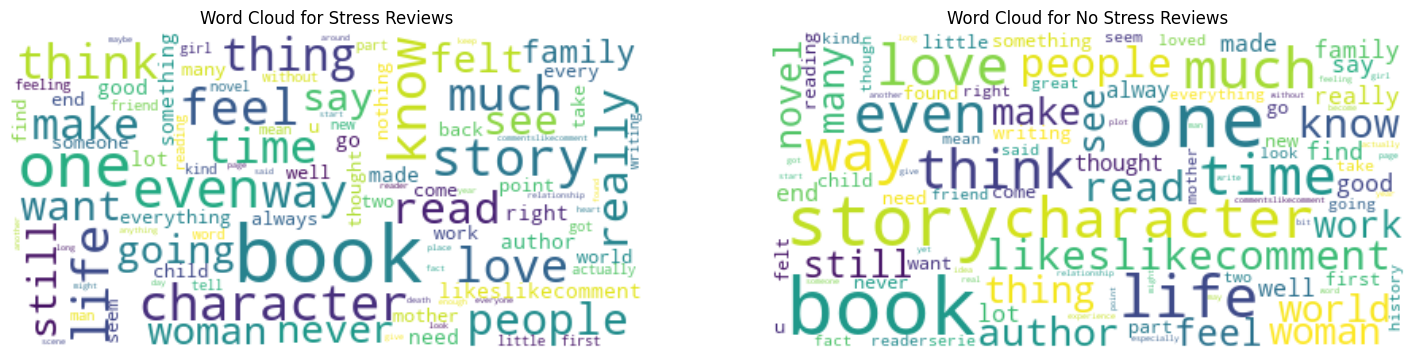

In [140]:
from wordcloud import WordCloud

# Subset the reviews based on predicted stress
stress_reviews = merged_review_data[merged_review_data['predicted_stress'] == 1]['processed_text']
no_stress_reviews = merged_review_data[merged_review_data['predicted_stress'] == 0]['processed_text']

# Generate word clouds for stressed reviews
stress_text = " ".join(review for review in stress_reviews)
stress_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(stress_text)

# Generate word clouds for non-stressed reviews
no_stress_text = " ".join(review for review in no_stress_reviews)
no_stress_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(no_stress_text)

# Display the word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].imshow(stress_wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Stress Reviews')
axes[0].axis('off')

axes[1].imshow(no_stress_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for No Stress Reviews')
axes[1].axis('off')

plt.show()


In these word clouds, we see a visual representation of the frequency of words used in reviews predicted to have stress compared to those without. This comparison can help us deduce various facets about the readers' responses and the content of the reviews.

**Word Cloud for Stress Reviews**:
- Words like "feel", "family", "love", and "story" are prominent, suggesting that stressful reviews may involve strong emotional connections or reactions to the family dynamics or relationships depicted in the books.
- The presence of words like "think" and "want" could indicate a deeper level of reflection or desire for something within the story or expected from it.

**Word Cloud for No Stress Reviews**:
- Positive words like "love", "enjoy", and "like" feature prominently, which could imply a more pleasurable or less emotionally turbulent reading experience.
- The words "time", "character", "book", and "story" remain significant, indicating these are central themes discussed by readers in their reviews regardless of stress.

Both clouds share key terms like "story", "book", "character", and "time", indicating these elements are central to readers' reviews. The nuanced differences in the additional words used may highlight the emotional undertones that differentiate stressed from non-stressed reviews.

The insights from these word clouds could be valuable for authors and publishers to understand what aspects of a narrative resonate with readers and provoke emotional reactions. For instance, it may be useful for an author to know if discussions of family and relationships are more likely to elicit stressed responses, which could inform the thematic development of future works.

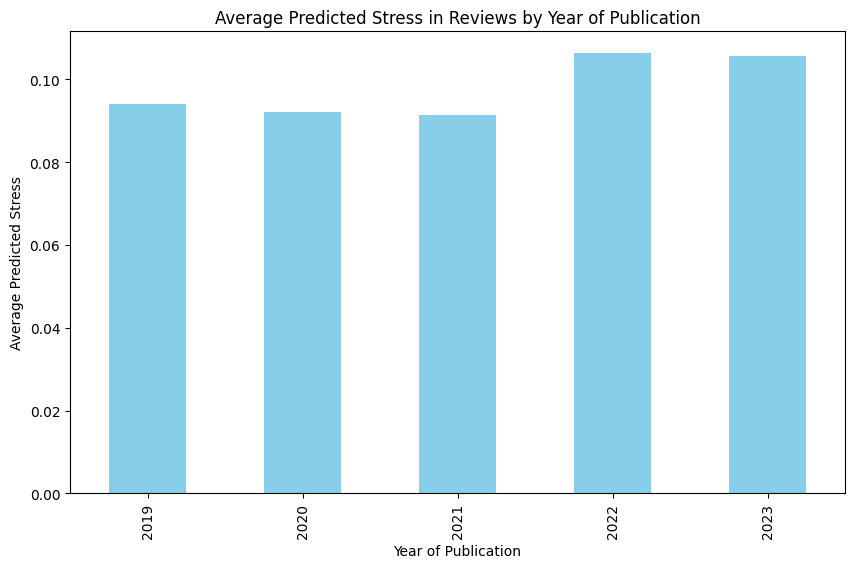

In [141]:
# Grouping by the 'year' of publication to see if there's a trend in stress over time
stress_by_year = merged_review_data.groupby('year')['predicted_stress'].mean()

# Plotting the trend of average predicted stress over the years
plt.figure(figsize=(10, 6))
stress_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Predicted Stress in Reviews by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Predicted Stress')

plt.show()

根据图表，我们可以观察到：

- 从2019年至2023年的这几年里，评论中预测的压力平均值在每一年都保持在一个相对稳定的范围内。这意味着无论书籍的出版年份如何，评论中的压力水平并没有显著的波动。
- 没有一个特定的年份显示出显著更高或更低的平均压力水平，这可能表明读者的压力反应更多地与书籍的具体内容或读者个人的经历有关，而不是出版年份。
- 平均压力水平整体较低，这表明在所有书评中，被识别为包含压力的评论只占一小部分。

从这些观察结果可以推断，书籍的出版年份不是决定评论中压力感知的主要因素。相反，其他因素，如书籍的题材、写作风格或文化和社会事件的影响，可能对读者的情绪反应有更大的影响。此外，由于平均预测压力在不同年份间相对一致，这也可能表明用于预测压力的模型具有一定的稳定性和一致性。

了解这一点对出版商和作家可能很有价值，因为它表明推广策略和读者反馈可能不需要根据出版年份进行调整，而更应关注书籍内容的质量和读者的兴趣点。